In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [3]:
# 1. 데이터 로드
df = pd.read_csv('archive/melb_data.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [4]:
# 2. 데이터 구조 및 기초 통계 확인
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


**Notes on Specific Variables**

Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

CouncilArea: Governing council for the area

In [6]:
# 3. 결측치 및 이상치 탐색
# - 결측치 탐색
missing_columns = df.columns[df.isnull().any()].tolist()
print(missing_columns)

['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']


In [7]:
print(df.isnull().sum())

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


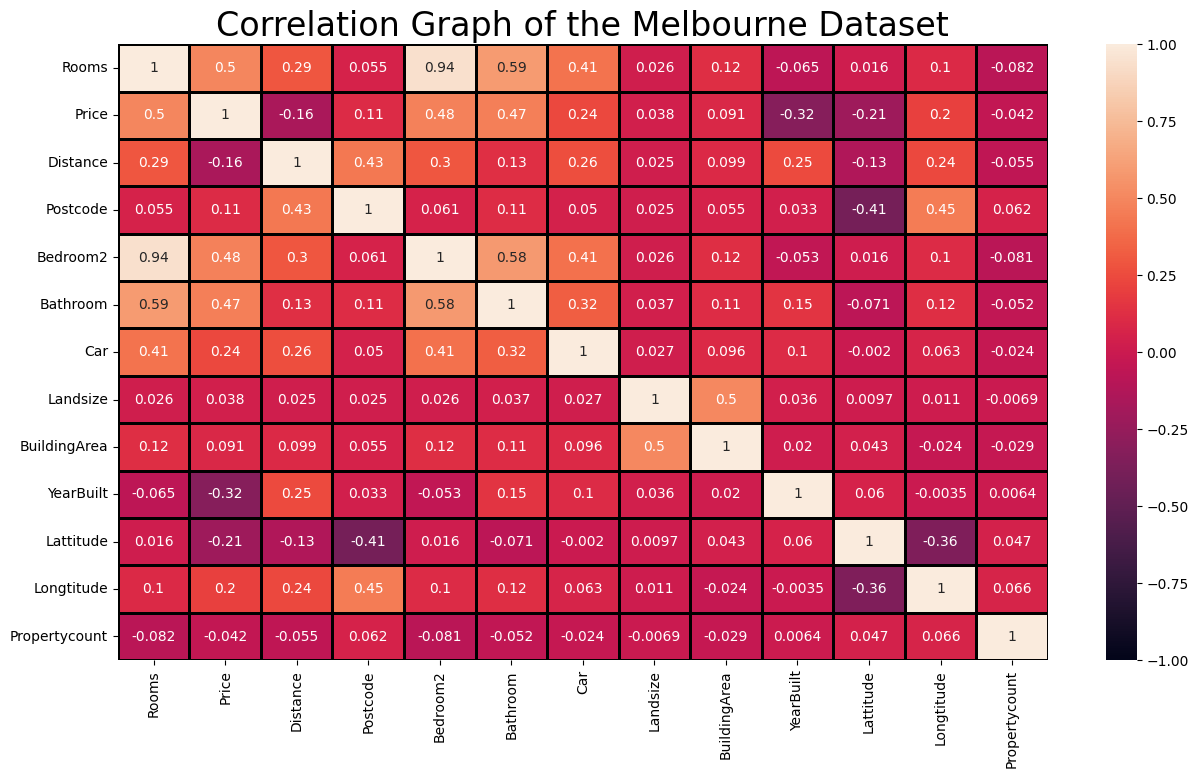

In [8]:
# 이상치 확인 전 상관관계 분석
corr_matrix = df.corr(numeric_only=True)
corr_matrix

plt.figure(figsize=(15,8))
corr = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, linewidths=1, linecolor='black')
corr.set_title('Correlation Graph of the Melbourne Dataset', fontdict={'fontsize': 24})
plt.show()

In [9]:
df_corr = df.corr(numeric_only=True)
df_corr['Price']
df_corr['Price'].sort_values(ascending=False)

Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
Car              0.238979
Longtitude       0.203656
Postcode         0.107867
BuildingArea     0.090981
Landsize         0.037507
Propertycount   -0.042153
Distance        -0.162522
Lattitude       -0.212934
YearBuilt       -0.323617
Name: Price, dtype: float64

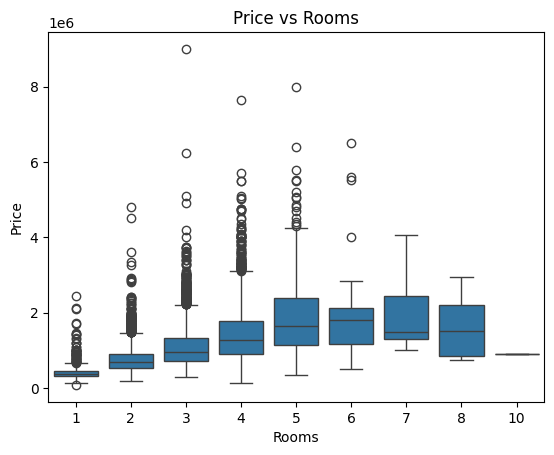

In [10]:
# - 이상치 탐색
sns.boxplot(x=df['Rooms'], y=df['Price'])
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.title('Price vs Rooms')
plt.show()

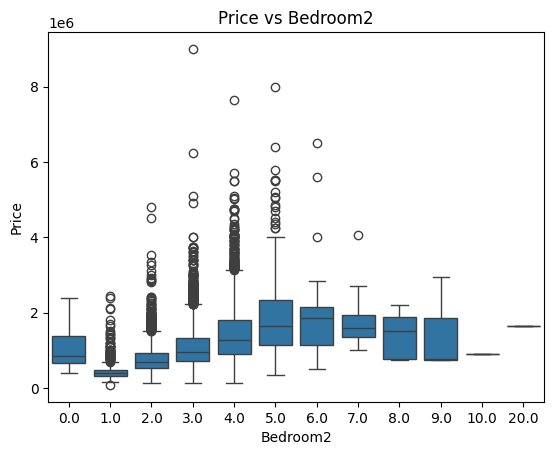

In [11]:
sns.boxplot(x=df['Bedroom2'], y=df['Price'])
plt.xlabel('Bedroom2')
plt.ylabel('Price')
plt.title('Price vs Bedroom2')
plt.show()

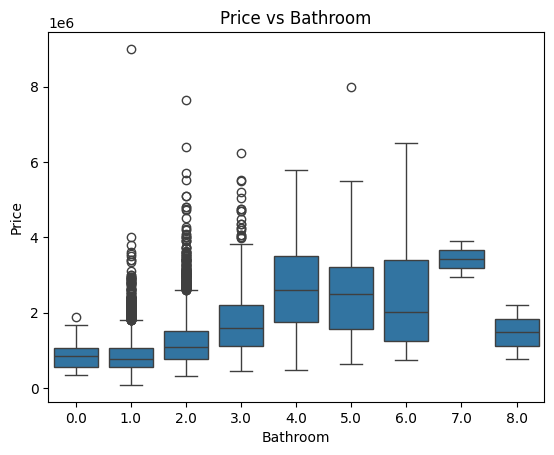

In [12]:
sns.boxplot(x=df['Bathroom'], y=df['Price'])
plt.xlabel('Bathroom')
plt.ylabel('Price')
plt.title('Price vs Bathroom')
plt.show()

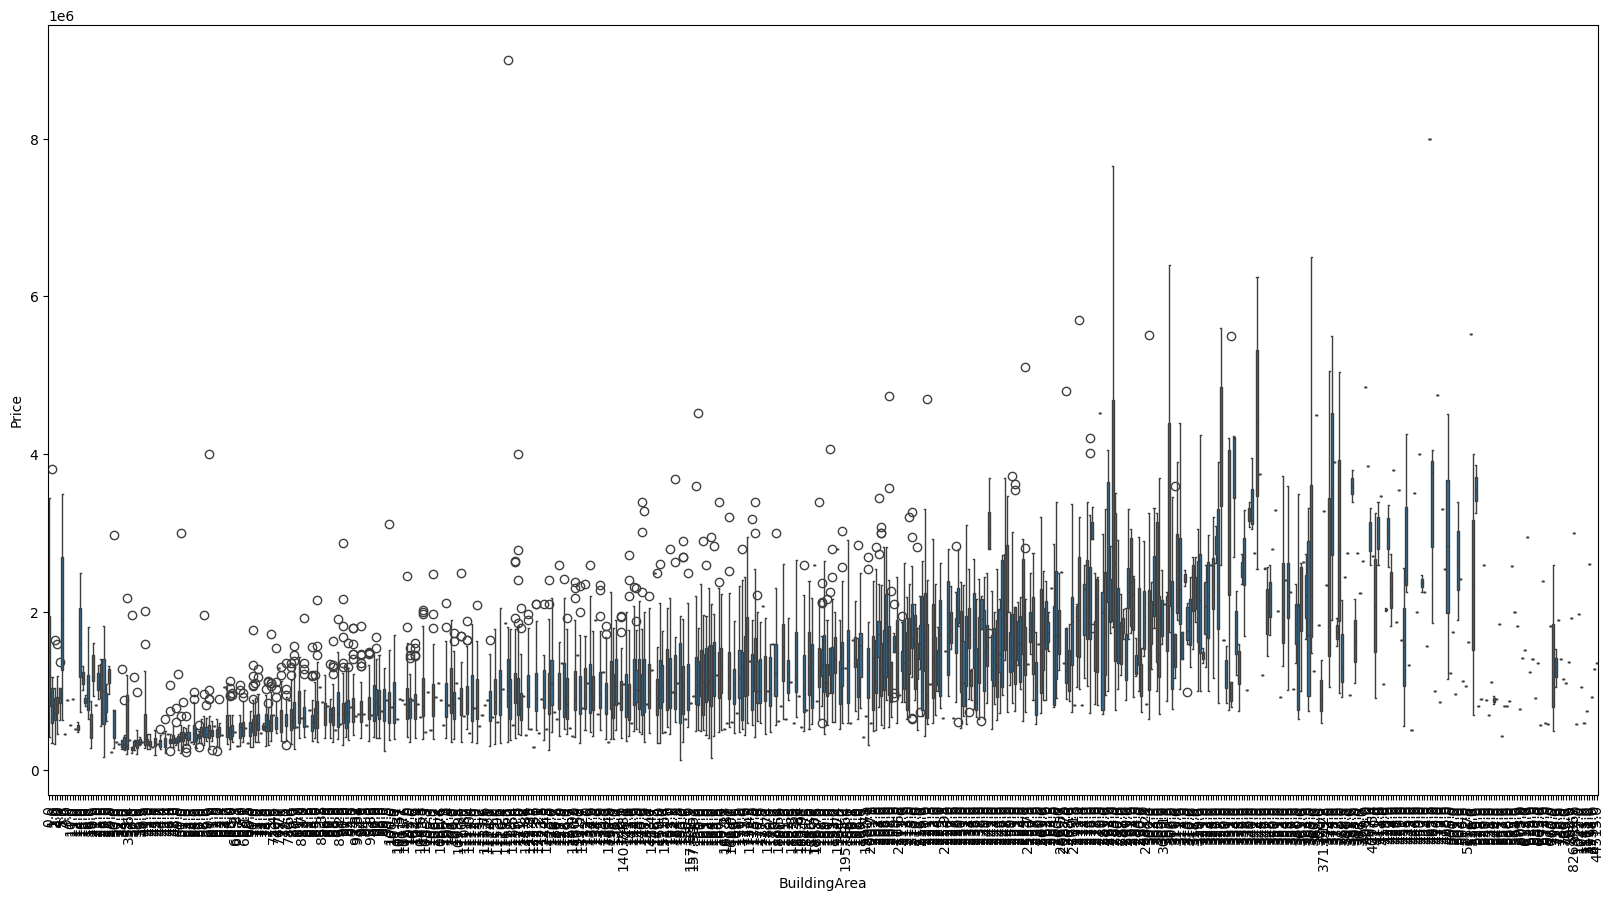

In [13]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['BuildingArea'], y=df['Price'])
plt.xticks(rotation=90)
plt.show()

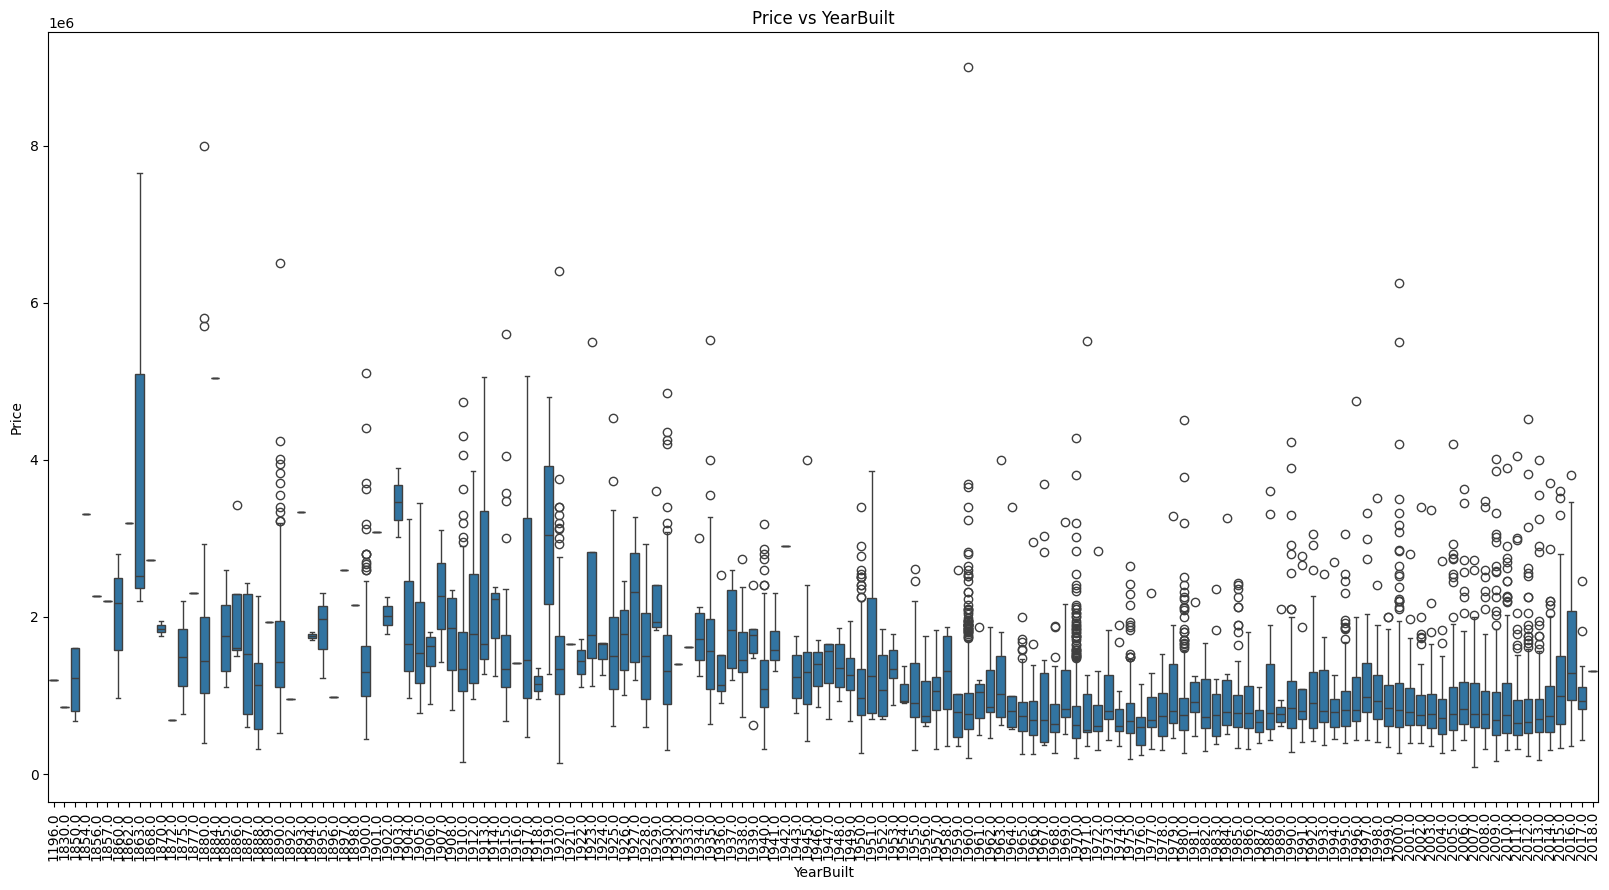

In [14]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['YearBuilt'], y=df['Price'])
plt.xlabel('YearBuilt')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Price vs YearBuilt')
plt.show()

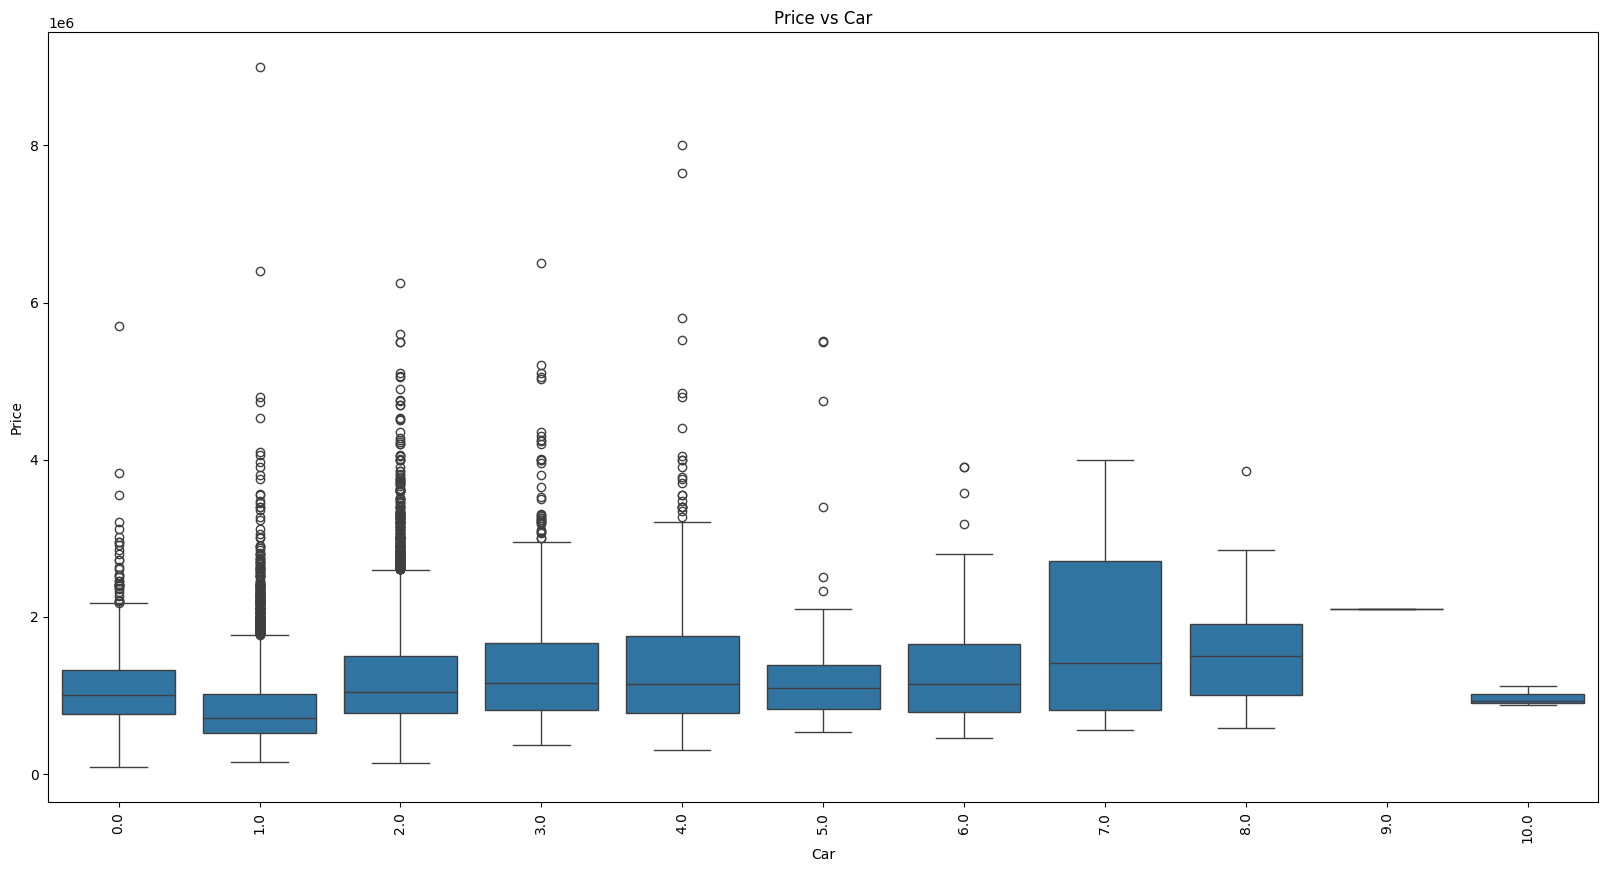

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['Car'], y=df['Price'])
plt.xlabel('Car')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Price vs Car')
plt.show()

In [16]:
df = df.dropna(subset=['BuildingArea', 'YearBuilt'], axis=0)
df = df.drop(['Address', 'Method', 'SellerG', 'Date', 'CouncilArea'], axis=1)

df.head()

,Suburb,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,2,h,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,3,h,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,4,h,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,3,h,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,2,h,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954,Northern Metropolitan,4019.0


In [17]:
latitude = df['Lattitude']
longitude = df['Longtitude']

df['Car'] = df['Car'].fillna(np.floor(df['Car'].mean()))

df.head()

,Suburb,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,2,h,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,3,h,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,4,h,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,3,h,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,2,h,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954,Northern Metropolitan,4019.0


In [18]:
count_NaN_afterDrops = df.isna().sum()
count_NaN_afterDrops

Suburb           0
Rooms            0
Type             0
Price            0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [19]:
ord_enc = OrdinalEncoder()
df['Region_code'] = ord_enc.fit_transform(df[['Regionname']])
df['Suburb_code'] = ord_enc.fit_transform(df[['Suburb']])
df['Type_code'] = ord_enc.fit_transform(df[['Type']])

In [20]:
Region_code = df[["Regionname", "Region_code"]].drop_duplicates().sort_values(by='Region_code')
Region_code

,Regionname,Region_code
969,Eastern Metropolitan,0.0
8815,Eastern Victoria,1.0
1,Northern Metropolitan,2.0
8789,Northern Victoria,3.0
4545,South-Eastern Metropolitan,4.0
78,Southern Metropolitan,5.0
38,Western Metropolitan,6.0
8871,Western Victoria,7.0


In [21]:
Suburb_code = df[["Suburb", "Suburb_code"]].drop_duplicates().sort_values(by='Suburb_code')
Suburb_code

,Suburb,Suburb_code
1,Abbotsford,0.0
6726,Aberfeldie,1.0
38,Airport West,2.0
11873,Albanvale,3.0
78,Albert Park,4.0
...,...,...
10563,Wollert,295.0
8991,Wyndham Vale,296.0
6608,Yallambie,297.0
11868,Yarra Glen,298.0


In [22]:
Type_code = df[["Type", "Type_code"]].drop_duplicates().sort_values(by='Type_code')
Type_code

,Type,Type_code
1,h,0.0
38,t,1.0
12,u,2.0


In [23]:
df

,Suburb,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,Region_code,Suburb_code,Type_code
1,Abbotsford,2,h,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,Northern Metropolitan,4019.0,2.0,0.0,0.0
2,Abbotsford,3,h,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,Northern Metropolitan,4019.0,2.0,0.0,0.0
4,Abbotsford,4,h,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,Northern Metropolitan,4019.0,2.0,0.0,0.0
6,Abbotsford,3,h,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,Northern Metropolitan,4019.0,2.0,0.0,0.0
7,Abbotsford,2,h,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,Northern Metropolitan,4019.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,Watsonia,2,h,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,Northern Metropolitan,2329.0,2.0,283.0,0.0
13573,Werribee,4,h,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,Western Metropolitan,16166.0,6.0,285.0,0.0
13576,Williamstown,3,h,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,Western Metropolitan,6380.0,6.0,292.0,0.0
13578,Williamstown,4,h,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,Western Metropolitan,6380.0,6.0,292.0,0.0


In [24]:
df_v = df.drop(['Suburb', 'Regionname', 'Type'], axis = 1)
df_v

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Region_code,Suburb_code,Type_code
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0,2.0,0.0,0.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0,2.0,0.0,0.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0,2.0,0.0,0.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0,2.0,0.0,0.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0,2.0,283.0,0.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0,6.0,285.0,0.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0,6.0,292.0,0.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0,6.0,292.0,0.0


In [25]:
def outlier_iqr(data, column): 

    global lower, upper    
 
    q1, q3 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
  
    iqr = q3 - q1 
 
    cut_off = iqr * 1.5          
   
    lower, upper = q1 - cut_off, q3 + cut_off     
    
    print('IQR: ',iqr)     
    print('lower bound: ', lower)     
    print('upper bound: ', upper)    
    
    outlier_upper = data[data[column] > upper]     
    ouliter_lower = data[data[column] < lower]    
 
    return print('Number of outlier in column [' + column + ']:', outlier_upper.shape[0] + ouliter_lower.shape[0], end='\n\n')

In [26]:
df_v.columns

for i in df_v.columns:
    outlier_iqr(df_v, i)

IQR:  2.0
lower bound:  -1.0
upper bound:  7.0
Number of outlier in column [Rooms]: 4

IQR:  705000.0
lower bound:  -427500.0
upper bound:  2392500.0
Number of outlier in column [Price]: 325

IQR:  6.9
lower bound:  -4.250000000000002
upper bound:  23.35
Number of outlier in column [Distance]: 225

IQR:  104.0
lower bound:  2888.0
upper bound:  3304.0
Number of outlier in column [Postcode]: 115

IQR:  2.0
lower bound:  -1.0
upper bound:  7.0
Number of outlier in column [Bedroom2]: 5

IQR:  1.0
lower bound:  -0.5
upper bound:  3.5
Number of outlier in column [Bathroom]: 93

IQR:  1.0
lower bound:  -0.5
upper bound:  3.5
Number of outlier in column [Car]: 315

IQR:  474.0
lower bound:  -545.0
upper bound:  1351.0
Number of outlier in column [Landsize]: 171

IQR:  79.75
lower bound:  -26.625
upper bound:  292.375
Number of outlier in column [BuildingArea]: 323

IQR:  60.0
lower bound:  1850.0
upper bound:  2090.0
Number of outlier in column [YearBuilt]: 2

IQR:  0.09964999999999691
lower 

Text(0.5, 1.0, 'Correlation Graph of the Melbourne Dataset')

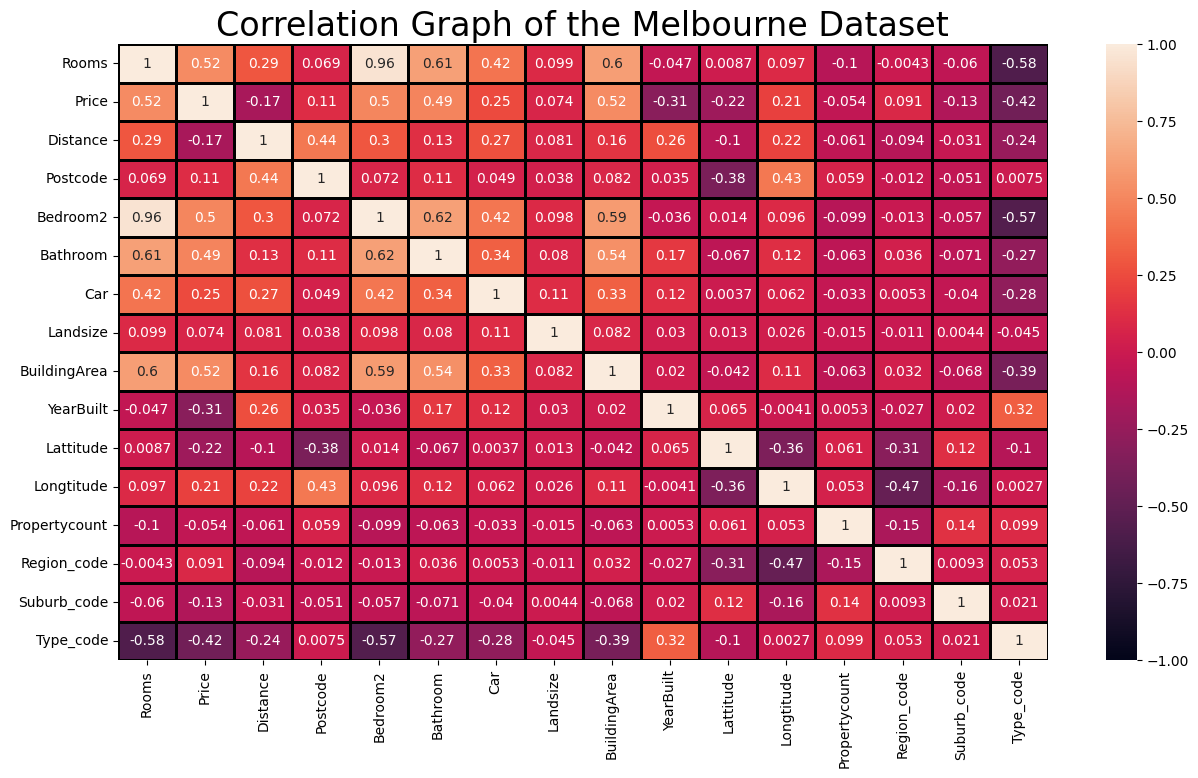

In [27]:
plt.figure(figsize=(15, 8))
correlation = sns.heatmap(df_v.corr(), vmin=-1, vmax=1, annot=True, linewidths=1, linecolor='black')
correlation.set_title('Correlation Graph of the Melbourne Dataset', fontdict={'fontsize': 24})

In [28]:
df_corr = df_v.corr()
df_corr['Price']
df_corr['Price'].sort_values(ascending=False)

Price            1.000000
BuildingArea     0.519284
Rooms            0.516664
Bedroom2         0.499531
Bathroom         0.491652
Car              0.248979
Longtitude       0.209356
Postcode         0.110401
Region_code      0.091032
Landsize         0.073576
Propertycount   -0.054202
Suburb_code     -0.130547
Distance        -0.166493
Lattitude       -0.217326
YearBuilt       -0.309277
Type_code       -0.419624
Name: Price, dtype: float64

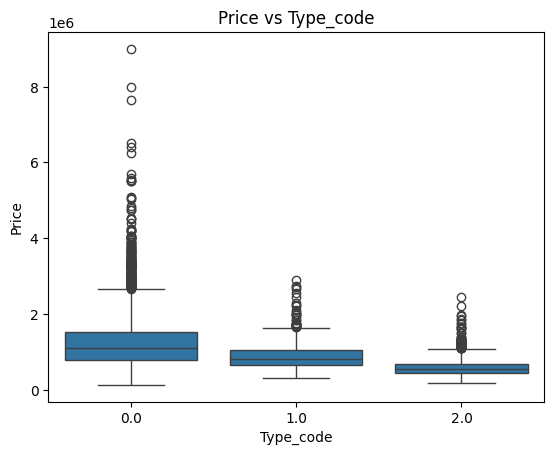

In [29]:
# 전처리 이후 box plot
# plt.figure(figsize=(20,10))
sns.boxplot(x=df['Type_code'], y=df['Price'])
plt.xlabel('Type_code')
# plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Price vs Type_code')
plt.show()

In [30]:
# import folium
# import matplotlib.colors as mcolors
# import branca.colormap as cm
# from matplotlib.colors import LogNorm

# # 전처리한 데이터로 map에 표시
# map = folium.Map(location = [-37.8, 145], zoom_control=True)

# price_min, price_max = df_v['Price'].min(), df_v['Price'].max()
# log_norm = LogNorm(vmin=price_min, vmax=price_max)
# cmap = plt.get_cmap('magma')

# log_min, log_max = np.log(price_min), np.log(price_max)

# # **Folium용 컬러맵(범례) 생성**
# colormap = cm.LinearColormap(
#     colors=[cmap(0), cmap(0.5), cmap(1)],  # 낮은 값(파랑) -> 중간(흰색) -> 높은 값(빨강)
#     vmin= price_min,
#     vmax= price_max
# )
# colormap.caption = "House Price Heatmap"
# colormap.add_to(map)  # Folium 지도에 추가

# for i,row in df_v.iterrows():
#     price_norm = log_norm(row['Price'])  # 가격을 0~1 사이로 정규화
#     color = mcolors.to_hex(cmap(price_norm))  # 정규화된 값을 색상으로 변환

#     folium.Circle(
#         location=df_v.loc[i,['Lattitude', 'Longtitude']].tolist(),
#         tooltip=None,
#         color=color,
#         fill=True,
#         fill_color=color,
#         fill_opacity=0.6,
#         radius=25
#         # radius=mel_df.loc[i,'Landsize']
#     ).add_to(map)

# map

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

C:\Users\Playdata\AppData\Local\Temp\ipykernel_10248\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

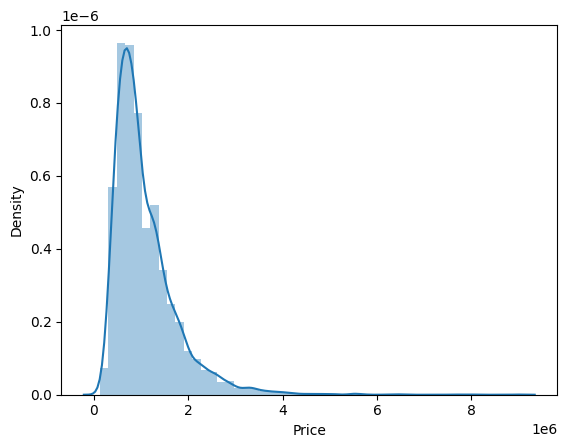

In [32]:
sns.distplot(df['Price'])

In [56]:
scaler = StandardScaler()

features = ['Rooms', 'BuildingArea', 'Car', 'Postcode']
target = 'Price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R²": r2}
    print(f"{name} - RMSE: {rmse:.2f}, R²: {r2:.4f}")

results_df = pd.DataFrame(results).T
print(results_df)


Linear Regression - RMSE: 297627556486.68, R²: 0.2695
Random Forest - RMSE: 133495192252.48, R²: 0.6723
XGBoost - RMSE: 105663386399.67, R²: 0.7407
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 441
[LightGBM] [Info] Number of data points in the train set: 5486, number of used features: 4
[LightGBM] [Info] Start training from score 1076853.317900
LightGBM - RMSE: 99064147517.97, R²: 0.7569
                           RMSE        R²
Linear Regression  2.976276e+11  0.269497
Random Forest      1.334952e+11  0.672347
XGBoost            1.056634e+11  0.740658
LightGBM           9.906415e+10  0.756855


c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

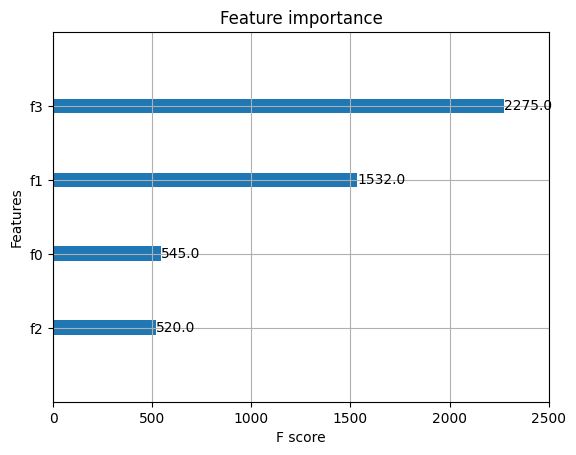

In [57]:
from xgboost import plot_importance

xgb_clf = XGBRegressor(learning_rate=0.1, random_state=42)
xgb_clf.fit(X_train, y_train)


fig, ax = plt.subplots()
plot_importance(xgb_clf,ax=ax)